## EXP_2467_sim_prune_0_4_256_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [18]:
exp_dict = OrderedDict()

#### Get MNIST data

In [19]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0


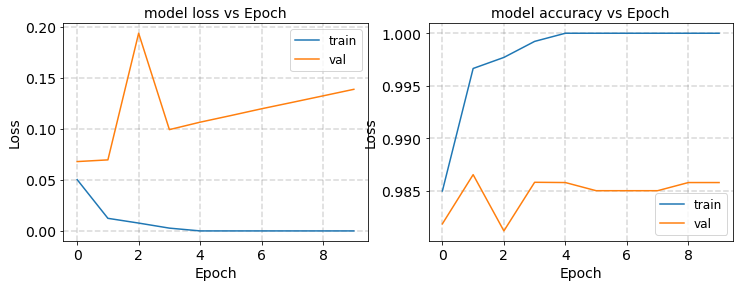

run 1


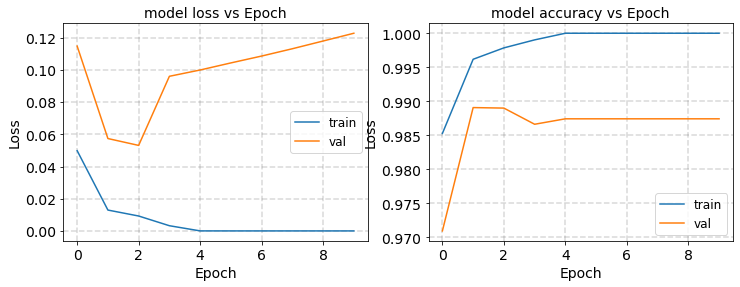

run 2


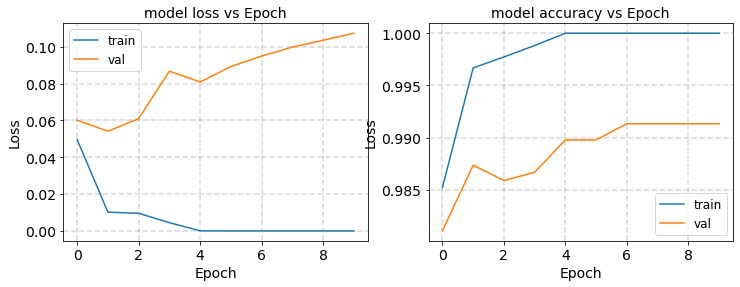

run 3


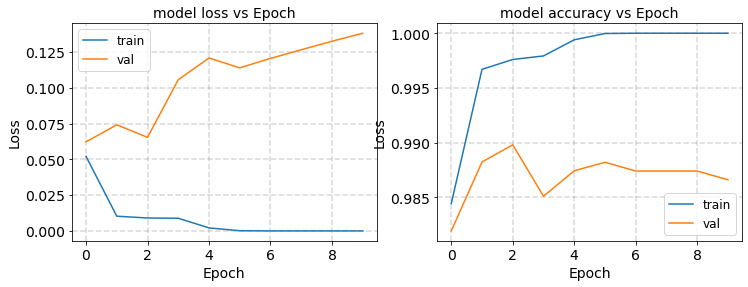

run 4


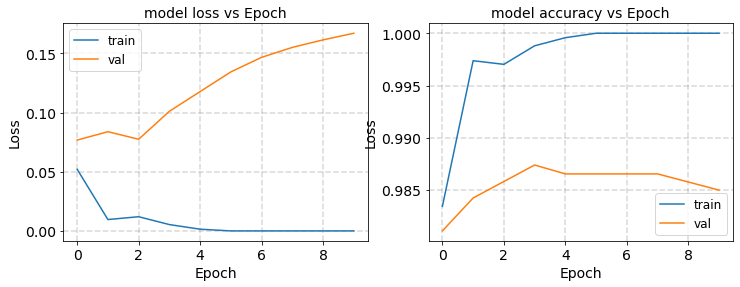

run 5


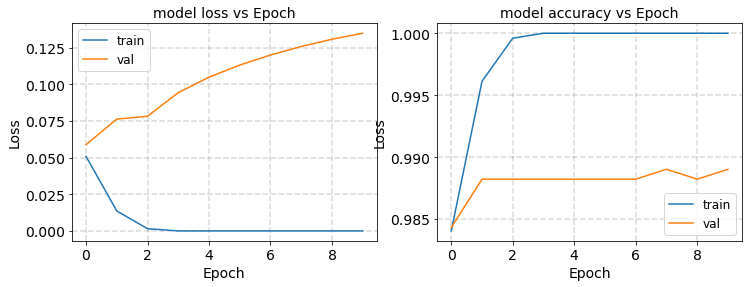

run 6


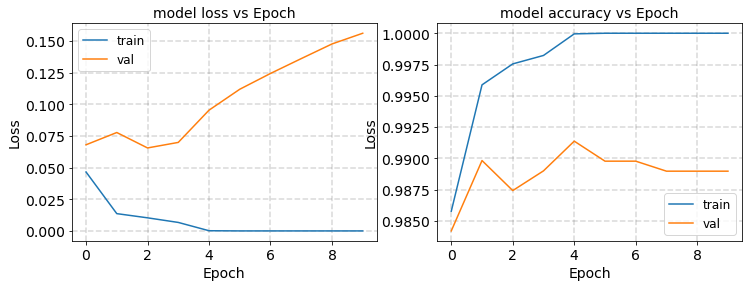

run 7


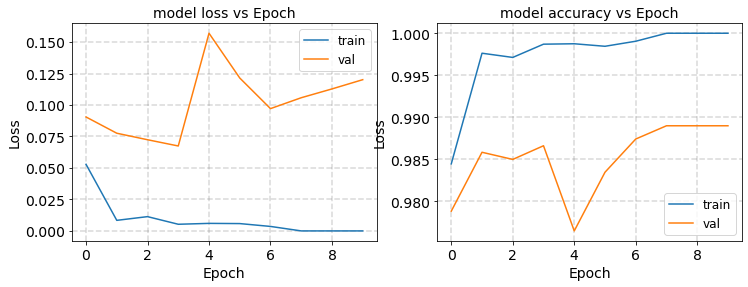

run 8


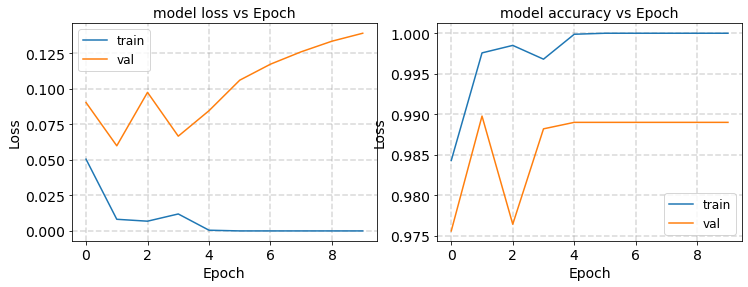

run 9


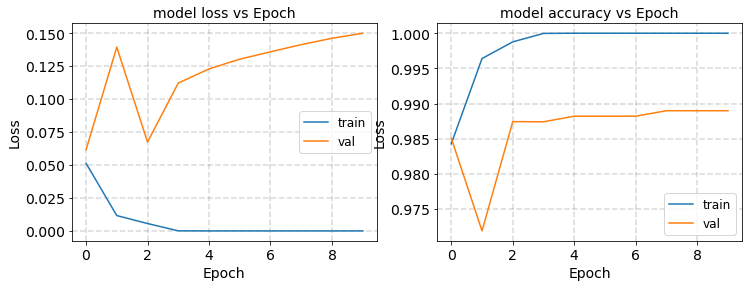

CPU times: user 27min 8s, sys: 1min 54s, total: 29min 2s
Wall time: 16min 6s


In [20]:
%%time
series = [2,4,6,7]
num_runs = 10
name = '2467_sim_prune_0_4_256_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    model, history = nc.make_train_simultaneous_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=256,
                                  num_output_nodes=4,
                                  pruning=None,
                                  epochs=10,
                                  verbose=0,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [21]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

,N_cut,Mean_n_cut_rand,Std_n_cut_rand,Ste_n_cut_rand,Percentile,P_value,Significance,Direction,Accuracy
2467_sim_prune_0_4_256_run0,2.41056,2.32057,0.0169655,0.00379361,100,0,Yes,larger,0.9858
2467_sim_prune_0_4_256_run1,2.37871,2.31978,0.0179557,0.00401501,100,0,Yes,larger,0.987425
2467_sim_prune_0_4_256_run2,2.31392,2.31917,0.020704,0.00462956,35,0.7,No,smaller,0.991325
2467_sim_prune_0_4_256_run3,2.34147,2.2824,0.0111706,0.00249782,100,0,Yes,larger,0.9866
2467_sim_prune_0_4_256_run4,2.33236,2.26778,0.0113663,0.00254159,100,0,Yes,larger,0.985
2467_sim_prune_0_4_256_run5,2.43515,2.36703,0.0171025,0.00382422,100,0,Yes,larger,0.989025
2467_sim_prune_0_4_256_run6,2.42788,2.28083,0.0141613,0.00316656,100,0,Yes,larger,0.988975
2467_sim_prune_0_4_256_run7,2.30716,2.25863,0.0102852,0.00229983,100,0,Yes,larger,0.989
2467_sim_prune_0_4_256_run8,2.37273,2.27538,0.0201849,0.00451348,100,0,Yes,larger,0.989
2467_sim_prune_0_4_256_run9,2.37635,2.34848,0.0228435,0.00510796,95,0.1,No,larger,0.988975


#### Save dataframe

In [22]:
import pickle
path = './Exps/'
with open(path + 'df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open(path + 'df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

,N_cut,Mean_n_cut_rand,Std_n_cut_rand,Ste_n_cut_rand,Percentile,P_value,Significance,Direction,Accuracy
2467_sim_prune_0_4_256_run0,2.41056,2.32057,0.0169655,0.00379361,100,0,Yes,larger,0.9858
2467_sim_prune_0_4_256_run1,2.37871,2.31978,0.0179557,0.00401501,100,0,Yes,larger,0.987425
2467_sim_prune_0_4_256_run2,2.31392,2.31917,0.020704,0.00462956,35,0.7,No,smaller,0.991325
2467_sim_prune_0_4_256_run3,2.34147,2.2824,0.0111706,0.00249782,100,0,Yes,larger,0.9866
2467_sim_prune_0_4_256_run4,2.33236,2.26778,0.0113663,0.00254159,100,0,Yes,larger,0.985
2467_sim_prune_0_4_256_run5,2.43515,2.36703,0.0171025,0.00382422,100,0,Yes,larger,0.989025
2467_sim_prune_0_4_256_run6,2.42788,2.28083,0.0141613,0.00316656,100,0,Yes,larger,0.988975
2467_sim_prune_0_4_256_run7,2.30716,2.25863,0.0102852,0.00229983,100,0,Yes,larger,0.989
2467_sim_prune_0_4_256_run8,2.37273,2.27538,0.0201849,0.00451348,100,0,Yes,larger,0.989
2467_sim_prune_0_4_256_run9,2.37635,2.34848,0.0228435,0.00510796,95,0.1,No,larger,0.988975


In [23]:
df_models[0].layers[1].get_weights()[0]

array([[ 0.0576911 ,  0.06479444,  0.06115301, ...,  0.07549052,
         0.03133477, -0.00654169],
       [-0.06471859, -0.03278573, -0.05459658, ..., -0.01602535,
         0.02002493, -0.01679932],
       [ 0.04586288, -0.02726708, -0.00705539, ..., -0.02369305,
         0.05675176, -0.0033408 ],
       ...,
       [ 0.05745332,  0.02720779,  0.04822269, ...,  0.00421783,
         0.03859277, -0.05266935],
       [ 0.03516392, -0.06067463,  0.04595444, ...,  0.0442209 ,
         0.06100594, -0.02275302],
       [-0.01130921, -0.02297239,  0.06252575, ..., -0.01629175,
        -0.03299813,  0.01963663]], dtype=float32)

#### Look at results of first experiment

In [24]:
for val in exp_dict[name + str(0)]:
    print(val)

2.4105623870987873
2.320573879297152
0.016965534371868908
0.003793608813010807
100.0
0.0
Yes
larger
0.98580002784729
